In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from PLUME_function import *
%matplotlib inline

# Analyse Préliminaire 
# I. Setup Database.

## Importation des données

In [2]:
Xtrain,Ytrain,Xtest,VarNames = DataImporting()

In [3]:
Xtrain.head()

,date,hour,day,month,isPublicHollyday,isPublicHollyday_-24,isPublicHollyday_+24,isSundayOrPublicHollyday,isSundayOrPublicHollyday_-24,isSundayOrPublicHollyday_+24,...,PM10_04034_-9,PM10_04034_-8,PM10_04034_-7,PM10_04034_-6,PM10_04034_-5,PM10_04034_-4,PM10_04034_-3,PM10_04034_-2,PM10_04034_-1,PM10_04034_0
0,2015-01-28 03,3,2,1,0,0,0,0,0,0,...,23,29.00,31.00,28.00,26.00,24.25,19.428581,19.412934,19,20
1,2015-01-28 04,4,2,1,0,0,0,0,0,0,...,29,31.00,28.00,26.00,24.25,22.50,19.428581,19.000000,20,20
2,2015-01-28 05,5,2,1,0,0,0,0,0,0,...,31,28.00,26.00,24.25,22.50,20.75,19.000000,20.000000,20,20
3,2015-01-28 06,6,2,1,0,0,0,0,0,0,...,28,26.00,24.25,22.50,20.75,19.00,20.000000,20.000000,20,18
4,2015-01-28 07,7,2,1,0,0,0,0,0,0,...,26,24.25,22.50,20.75,19.00,20.00,20.000000,20.000000,18,15


In [4]:
Ytrain.head()

,PM2_5_04143_1,PM2_5_04143_2,PM2_5_04143_3,PM2_5_04143_4,PM2_5_04143_5,PM2_5_04143_6,PM2_5_04143_7,PM2_5_04143_8,PM2_5_04143_9,PM2_5_04143_10,...,NO2_04143_15,NO2_04143_16,NO2_04143_17,NO2_04143_18,NO2_04143_19,NO2_04143_20,NO2_04143_21,NO2_04143_22,NO2_04143_23,NO2_04143_24
0,10,10,9,9,8,11,10,11,13,10,...,55.000000,34.000000,39.000000,36.666667,33.294647,33.29782,33.297246,33.299169,25,20
1,10,9,9,8,11,10,11,13,10,8,...,34.000000,39.000000,36.666667,34.333333,33.294647,33.29782,33.297246,25.000000,20,15
2,9,9,8,11,10,11,13,10,8,10,...,39.000000,36.666667,34.333333,32.000000,33.294647,33.29782,25.000000,20.000000,15,18
3,9,8,11,10,11,13,10,8,10,5,...,36.666667,34.333333,32.000000,33.299918,33.294647,25.00000,20.000000,15.000000,18,16
4,8,11,10,11,13,10,8,10,5,2,...,34.333333,32.000000,33.292928,33.299918,25.000000,20.00000,15.000000,18.000000,16,28


## Test

In [5]:
a = [var.split("_")[0] for var in VarNames]
a = np.array(a)
from collections import Counter
Counter(a)
#VarNames

Counter({'NO2': 11,
         'O3': 10,
         'PM10': 8,
         'PM2': 4,
         'cloudCover': 1,
         'date': 1,
         'day': 1,
         'dewPoint': 1,
         'hour': 1,
         'humidity': 1,
         'isPublicHollyday': 1,
         'isSaturday': 1,
         'isSundayOrPublicHollyday': 1,
         'month': 1,
         'precipIntensity': 1,
         'precipProbability': 1,
         'pressure': 1,
         'sunPower': 1,
         'temperature': 1,
         'windBearingCos': 17,
         'windBearingSin': 17,
         'windSpeed': 17})

In [6]:
DataSample(Xtrain,"windBearing","2015-01-30")

,windBearingCos_04099_-24,windBearingCos_04099_-23,windBearingCos_04099_-22,windBearingCos_04099_-21,windBearingCos_04099_-20,windBearingCos_04099_-19,windBearingCos_04099_-18,windBearingCos_04099_-17,windBearingCos_04099_-16,windBearingCos_04099_-15,...,windBearingSin_04034_15,windBearingSin_04034_16,windBearingSin_04034_17,windBearingSin_04034_18,windBearingSin_04034_19,windBearingSin_04034_20,windBearingSin_04034_21,windBearingSin_04034_22,windBearingSin_04034_23,windBearingSin_04034_24
45,-0.374607,-0.309017,-0.544639,-0.681998,-0.587785,-0.484810,-0.615661,-0.559193,-0.587785,-0.707107,...,-0.731354,-0.719340,-0.642788,-0.669131,-0.999391,-0.754710,-0.469472,-0.656059,-0.573576,-0.642788
46,-0.309017,-0.544639,-0.681998,-0.587785,-0.484810,-0.615661,-0.559193,-0.587785,-0.707107,-0.601815,...,-0.719340,-0.642788,-0.669131,-0.999391,-0.754710,-0.469472,-0.656059,-0.573576,-0.642788,-0.913545
47,-0.544639,-0.681998,-0.587785,-0.484810,-0.615661,-0.559193,-0.587785,-0.707107,-0.601815,-0.788011,...,-0.642788,-0.669131,-0.999391,-0.754710,-0.469472,-0.656059,-0.573576,-0.642788,-0.913545,-0.906308
48,-0.681998,-0.587785,-0.484810,-0.615661,-0.559193,-0.587785,-0.707107,-0.601815,-0.788011,-0.681998,...,-0.669131,-0.999391,-0.754710,-0.469472,-0.656059,-0.573576,-0.642788,-0.913545,-0.906308,-0.951057
49,-0.587785,-0.484810,-0.615661,-0.559193,-0.587785,-0.707107,-0.601815,-0.788011,-0.681998,-0.798636,...,-0.999391,-0.754710,-0.469472,-0.656059,-0.573576,-0.642788,-0.913545,-0.906308,-0.951057,-0.987688
50,-0.484810,-0.615661,-0.559193,-0.587785,-0.707107,-0.601815,-0.788011,-0.681998,-0.798636,-0.681998,...,-0.754710,-0.469472,-0.656059,-0.573576,-0.642788,-0.913545,-0.906308,-0.951057,-0.987688,-0.981627
51,-0.615661,-0.559193,-0.587785,-0.707107,-0.601815,-0.788011,-0.681998,-0.798636,-0.681998,-0.766044,...,-0.469472,-0.656059,-0.573576,-0.642788,-0.913545,-0.906308,-0.951057,-0.987688,-0.981627,-0.999391
52,-0.559193,-0.587785,-0.707107,-0.601815,-0.788011,-0.681998,-0.798636,-0.681998,-0.766044,-0.731354,...,-0.656059,-0.573576,-0.642788,-0.913545,-0.906308,-0.951057,-0.987688,-0.981627,-0.999391,-0.998630
53,-0.587785,-0.707107,-0.601815,-0.788011,-0.681998,-0.798636,-0.681998,-0.766044,-0.731354,-0.694658,...,-0.573576,-0.642788,-0.913545,-0.906308,-0.951057,-0.987688,-0.981627,-0.999391,-0.998630,-0.978148
54,-0.707107,-0.601815,-0.788011,-0.681998,-0.798636,-0.681998,-0.766044,-0.731354,-0.694658,-0.342020,...,-0.642788,-0.913545,-0.906308,-0.951057,-0.987688,-0.981627,-0.999391,-0.998630,-0.978148,-0.984808


In [7]:
DataOutput('test.csv',Xtrain,"windBearingSin_04145",'2015-01-28')

'The file has been created !'

/Users/duqiming2004/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


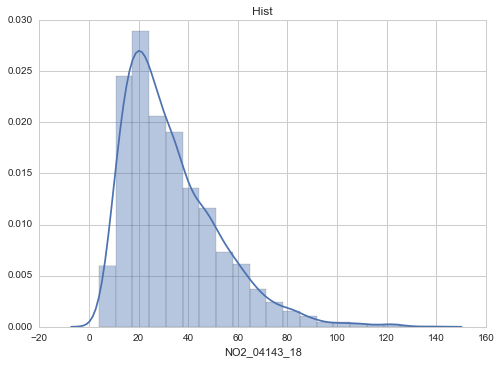

In [8]:
import seaborn as sns
#data = DataSample(Xtrain,"windBearingCos_04034",'2015-01-30').iloc[0,1:]
data = Ytrain.iloc[:,89]
#data = np.log(data+1)
sns.set_style('whitegrid')
sns.plt.title('Hist')
sns.distplot(data, norm_hist=True,bins =20)

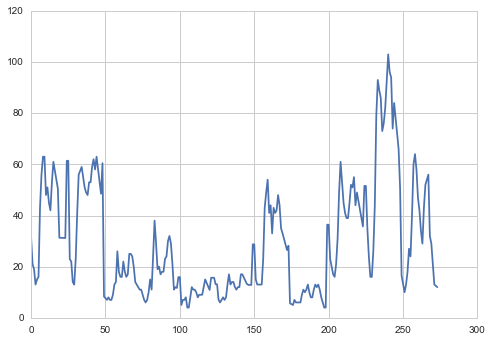

In [9]:
a = DataSample(Xtrain,"NO2",'2015-01-30 00').iloc[0,:].values
plt.plot(list(a[1:]))

/Users/duqiming2004/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


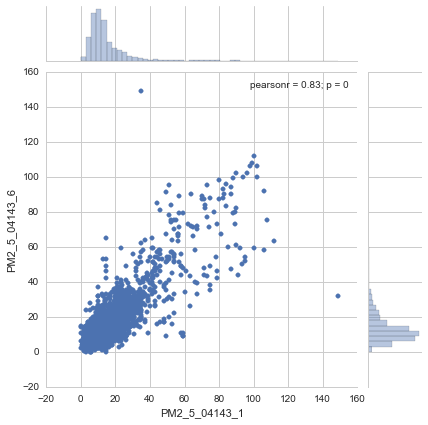

In [10]:
a = sns.jointplot(x="PM2_5_04143_1", y="PM2_5_04143_6", data=Ytrain);

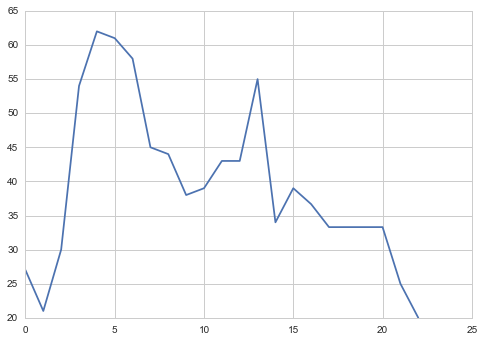

In [11]:
a = DataSample(Ytrain,"NO2").iloc[0,:].values
plt.plot(list(a[1:]))

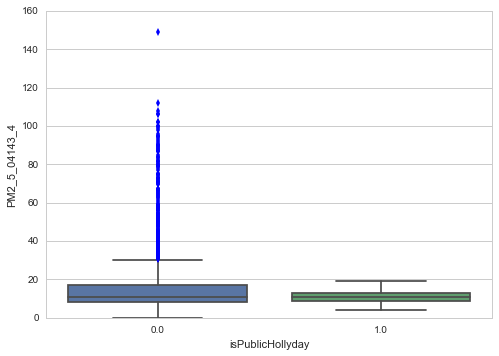

In [12]:
sns.boxplot(Xtrain.iloc[:,4],Ytrain.iloc[:,3])

In [13]:
Ytrain.columns

Index([u'PM2_5_04143_1', u'PM2_5_04143_2', u'PM2_5_04143_3', u'PM2_5_04143_4',
       u'PM2_5_04143_5', u'PM2_5_04143_6', u'PM2_5_04143_7', u'PM2_5_04143_8',
       u'PM2_5_04143_9', u'PM2_5_04143_10', u'PM2_5_04143_11',
       u'PM2_5_04143_12', u'PM2_5_04143_13', u'PM2_5_04143_14',
       u'PM2_5_04143_15', u'PM2_5_04143_16', u'PM2_5_04143_17',
       u'PM2_5_04143_18', u'PM2_5_04143_19', u'PM2_5_04143_20',
       u'PM2_5_04143_21', u'PM2_5_04143_22', u'PM2_5_04143_23',
       u'PM2_5_04143_24', u'PM10_04143_1', u'PM10_04143_2', u'PM10_04143_3',
       u'PM10_04143_4', u'PM10_04143_5', u'PM10_04143_6', u'PM10_04143_7',
       u'PM10_04143_8', u'PM10_04143_9', u'PM10_04143_10', u'PM10_04143_11',
       u'PM10_04143_12', u'PM10_04143_13', u'PM10_04143_14', u'PM10_04143_15',
       u'PM10_04143_16', u'PM10_04143_17', u'PM10_04143_18', u'PM10_04143_19',
       u'PM10_04143_20', u'PM10_04143_21', u'PM10_04143_22', u'PM10_04143_23',
       u'PM10_04143_24', u'O3_04143_1', u'O3_04143_2', u'

In [14]:
np.shape(Xtrain)

(4031, 3729)

In [15]:
np.shape(Ytrain)

(4031, 96)

In [16]:
#DataSample(Ytrain,"PM2_5_04143_2")
#DataSample(Xtrain,"windBearing","2015-01-30 07")

In [46]:
X_hour = 0
Object = 'O3'
Y_hour = 1
SimpleRegression(Xtrain,Ytrain,X_hour,Y_hour,Object)

MSE = O3_04143_1    180.598988
dtype: float64

R2 = 0.664651460691



(0.66465146069118464, O3_04143_1    180.598988
 dtype: float64)

In [47]:
a = [var.split("_")[0] for var in VarNames]
a = np.array(a)
from collections import Counter
Counter(a)
#VarNames

Counter({'NO2': 11,
         'O3': 10,
         'PM10': 8,
         'PM2': 4,
         'cloudCover': 1,
         'date': 1,
         'day': 1,
         'dewPoint': 1,
         'hour': 1,
         'humidity': 1,
         'isPublicHollyday': 1,
         'isSaturday': 1,
         'isSundayOrPublicHollyday': 1,
         'month': 1,
         'precipIntensity': 1,
         'precipProbability': 1,
         'pressure': 1,
         'sunPower': 1,
         'temperature': 1,
         'windBearingCos': 17,
         'windBearingSin': 17,
         'windSpeed': 17})

In [69]:
DataSample(Xtrain,'precipProbability')
#Xtrain.loc[Xtrain.precipProbability.values > 0]
Xtrain['precipProbability_04143_-24'].loc[Xtrain['precipProbability_04143_-24']> 0]

36      0.01
38      0.52
39      0.29
51      0.02
56      0.02
59      0.53
60      0.48
62      0.46
63      0.29
66      0.25
68      0.42
69      0.45
72      0.15
74      0.41
75      0.27
80      0.01
81      0.63
83      0.15
95      0.49
96      0.43
107     0.06
110     0.59
111     0.47
116     0.27
117     0.33
119     0.40
131     0.22
132     0.37
135     0.02
140     0.37
        ... 
3714    0.56
3715    0.61
3717    0.02
3733    0.06
3735    0.01
3738    0.03
3739    0.44
3763    0.06
3766    0.15
3771    0.49
3772    0.55
3774    0.54
3775    0.54
3777    0.62
3778    0.62
3780    0.58
3781    0.63
3783    0.63
3784    0.65
3786    0.63
3787    0.63
3789    0.52
3790    0.29
3889    0.46
3891    0.53
3892    0.07
3898    0.03
3916    0.06
4000    0.46
4002    0.15
Name: precipProbability_04143_-24, dtype: float64